# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
np.random.seed(100)

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [3]:
print('check_data_shape:\ntrain:{}\ntest:{}\n'.format(x_train.shape, x_test.shape))
print('check_label_shape:\ntrain:{}\ntest:{}'.format(y_train.shape, y_test.shape))

check_data_shape:
train:(50000, 32, 32, 3)
test:(10000, 32, 32, 3)

check_label_shape:
train:(50000, 1)
test:(10000, 1)


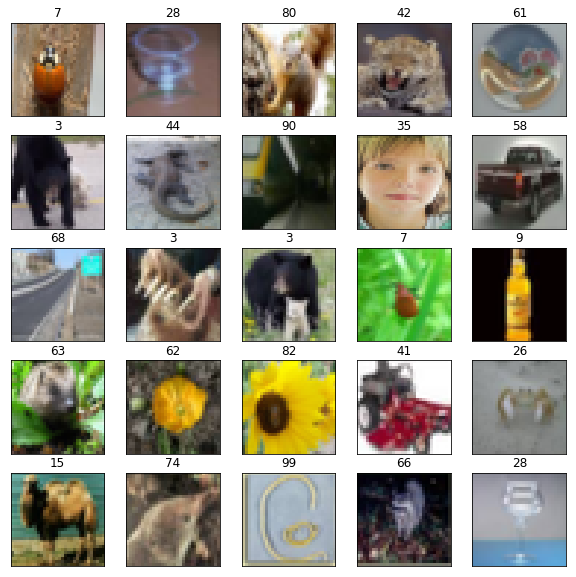

In [4]:
#show_img
def show_grid_img(x_train, y_train, col_num = 5, row_num = 5):
    fig, axes = plt.subplots(row_num, col_num, figsize=(10, 10))
    axes = axes.reshape(-1,)
    random_idx = np.random.choice(x_train.shape[0], size=(row_num*col_num,))
    for ax, idx in zip(axes, random_idx):
        ax.imshow(x_train[idx])
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(y_train[idx][0])

show_grid_img(x_train, y_train)

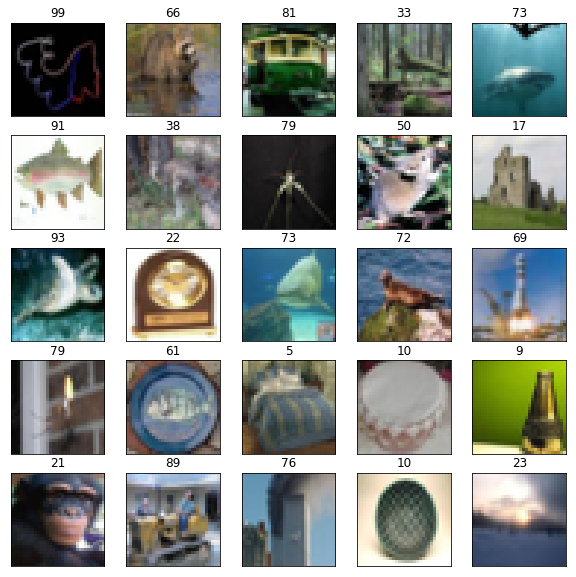

In [5]:
#show test img
show_grid_img(x_test, y_test)

# 資料準備

In [6]:
y_train.shape

(50000, 1)

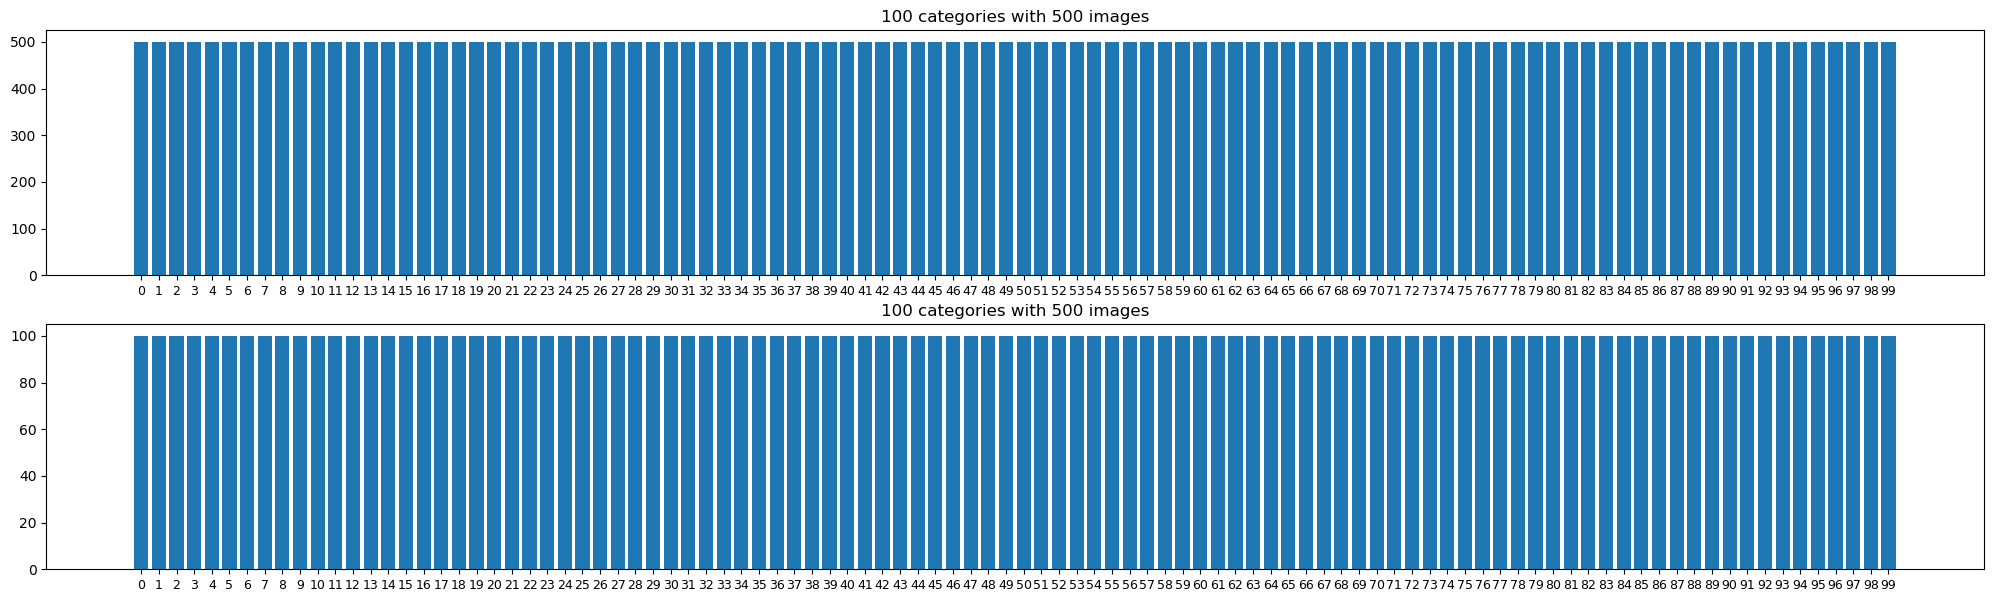

In [7]:
#check data distribution
plt.style.use('default')
y_train_s = pd.Series(y_train.reshape(-1,)).value_counts()
y_test_s = pd.Series(y_test.reshape(-1,)).value_counts()
plt.figure(figsize=(25, 7))
for idx, yy in enumerate([y_train_s, y_test_s]):
    plt.subplot(2, 1, idx+1)
    plt.bar(yy.index, yy.values)
    plt.xticks(list(range(0, 100)), fontsize=9)
    plt.title('100 categories with 500 images');

# Image normalize 

In [8]:
x_train_normalize = x_train.astype('float32') / 255
x_test_normalize = x_test.astype('float32') / 255

# 轉換label 為OneHot Encoding

In [9]:
y_train_OHE = to_categorical(y_train, num_classes=100)
y_test_OHE = to_categorical(y_test, num_classes=100)

[0.43137255 0.43137255 0.43137255]
[0.9137255  0.45882353 0.42745098]


C:\Users\crea\Anaconda3\envs\keras_yolov3\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


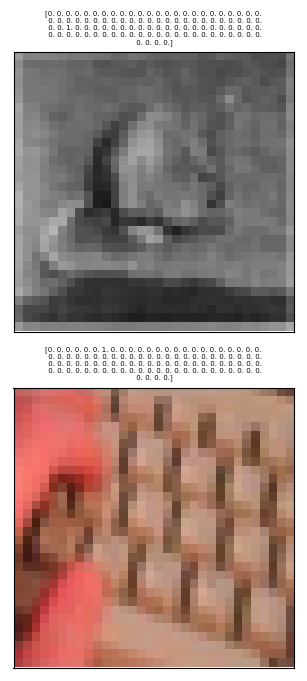

In [10]:
#check result
plt.figure(figsize=(10, 8))
for idx, dd in enumerate((x_train_normalize, x_test_normalize)):
    random_idx = np.random.randint(0, x_test.shape[0])
    print(dd[random_idx, 5, 5])
    plt.subplot(2, 1, idx+1)
    plt.imshow(dd[random_idx])
    plt.xticks([]), plt.yticks([])
    if idx==0:
        plt.title(y_train_OHE[random_idx], fontsize=5)
    else:
        plt.title(y_train_OHE[random_idx], fontsize=5)
